# MSG Pipeline Walkthrough

In this demo, we will do a full walkthrough of a minimal MSG pipeline to get some data for training

In [30]:
import autoroot
from rs_tools._src.utils.io import get_list_filenames
import rioxarray
import xarray as xr
import pandas as pd
import numpy as np
from satpy import Scene
from pathlib import Path
from rs_tools._src.data.modis.bands import MODIS_VARIABLES
from rs_tools._src.data.modis import MODISFileName, MODIS_ID_TO_NAME, MODIS_NAME_TO_ID, get_modis_paired_files

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from dataclasses import dataclass
from tqdm.auto import tqdm
from datetime import datetime

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
save_dir_raw = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/"
save_dir_analysis = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/analysis/"
save_dir_mlready = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/mlready/"

## 1 - Download Data

In [12]:
start_date = "2020-10-01"
end_date = "2020-10-01"
start_time = "15:05:00"
end_time = "16:05:00"
time_step = "00:15:00"
instrument = "HRSEVIRI"

In [15]:
eumdac_key=''
eumdac_secret=''

In [13]:
from rs_tools._src.data.msg.download import msg_download

#### Radiance Data

In [14]:
msg_download(
    start_date=start_date,
    end_date=end_date,
    start_time=start_time,
    end_time=end_time,
    time_step=time_step,
    instrument=instrument,
    save_dir=save_dir_raw,
    eumdac_key=eumdac_key,
    eumdac_secret=eumdac_secret
)

2024-03-21 14:27:53.939 | INFO     | rs_tools._src.data.msg.download:_check_eumdac_login:225 - EUMDAC login successful. Token '652ea05f-a4b8-3807-a3c4-e214ac62966d' expires 2024-03-21 15:26:03.780747
2024-03-21 14:27:53.939 | INFO     | rs_tools._src.data.msg.download:msg_download:95 - Data Product: EO:EUM:DAT:MSG:HRSEVIRI


Times to check:  2020-10-01 15:05:00 2020-10-01 15:50:00


Time - 2020-10-01 15:20:00:  25%|██▌       | 1/4 [01:00<03:01, 60.61s/it]

Successfully downloaded MSG4-SEVI-MSG15-0100-NA-20201001151243.638000000Z-NA.nat.
['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001151243.638000000Z-NA.nat']


Time - 2020-10-01 15:35:00:  50%|█████     | 2/4 [02:13<02:15, 67.90s/it]

Successfully downloaded MSG4-SEVI-MSG15-0100-NA-20201001152743.698000000Z-NA.nat.
['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001152743.698000000Z-NA.nat']


Time - 2020-10-01 15:50:00:  75%|███████▌  | 3/4 [03:43<01:18, 78.17s/it]

Successfully downloaded MSG4-SEVI-MSG15-0100-NA-20201001154243.758000000Z-NA.nat.
['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001154243.758000000Z-NA.nat']


Time - 2020-10-01 15:50:00: 100%|██████████| 4/4 [05:14<00:00, 78.68s/it]

Successfully downloaded MSG4-SEVI-MSG15-0100-NA-20201001155743.818000000Z-NA.nat.
['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001155743.818000000Z-NA.nat']


['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001151243.638000000Z-NA.nat',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001152743.698000000Z-NA.nat',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001154243.758000000Z-NA.nat',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001155743.818000000Z-NA.nat']

#### Cloud Mask

In [20]:
start_time = "15:00:00"
end_time = "16:15:00"
instrument = "CLM"

In [21]:
msg_download(
    start_date=start_date,
    end_date=end_date,
    start_time=start_time,
    end_time=end_time,
    time_step=time_step,
    instrument=instrument,
    save_dir=save_dir_raw,
    eumdac_key=eumdac_key,
    eumdac_secret=eumdac_secret
)

2024-03-21 14:35:55.075 | INFO     | rs_tools._src.data.msg.download:_check_eumdac_login:224 - EUMDAC login successful. Token '652ea05f-a4b8-3807-a3c4-e214ac62966d' expires 2024-03-21 15:26:02.899527
2024-03-21 14:35:55.076 | INFO     | rs_tools._src.data.msg.download:msg_download:95 - Data Product: EO:EUM:DAT:MSG:CLM


Times to check:  2020-10-01 15:00:00 2020-10-01 16:00:00


Time - 2020-10-01 15:15:00:  20%|██        | 1/5 [00:03<00:14,  3.67s/it]

Successfully downloaded MSG4-SEVI-MSGCLMK-0100-0100-20201001150000.000000000Z-NA.grb.


Time - 2020-10-01 15:30:00:  40%|████      | 2/5 [00:07<00:11,  3.95s/it]

Successfully downloaded MSG4-SEVI-MSGCLMK-0100-0100-20201001151500.000000000Z-NA.grb.


Time - 2020-10-01 15:45:00:  60%|██████    | 3/5 [00:15<00:11,  5.64s/it]

Successfully downloaded MSG4-SEVI-MSGCLMK-0100-0100-20201001153000.000000000Z-NA.grb.


Time - 2020-10-01 16:00:00:  80%|████████  | 4/5 [00:20<00:05,  5.38s/it]

Successfully downloaded MSG4-SEVI-MSGCLMK-0100-0100-20201001154500.000000000Z-NA.grb.


Time - 2020-10-01 16:00:00: 100%|██████████| 5/5 [00:25<00:00,  5.07s/it]

Successfully downloaded MSG4-SEVI-MSGCLMK-0100-0100-20201001160000.000000000Z-NA.grb.


['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSGCLMK-0100-0100-20201001150000.000000000Z-NA.grb',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSGCLMK-0100-0100-20201001151500.000000000Z-NA.grb',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSGCLMK-0100-0100-20201001153000.000000000Z-NA.grb',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSGCLMK-0100-0100-20201001154500.000000000Z-NA.grb',
 '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSGCLMK-0100-0100-20201001160000.000000000Z-NA.grb']

For this case, we are going to download MSG data.

**Resources**:
* EUMETSAT Downloader - [Webpage](https://user.eumetsat.int/dashboard)

In [3]:
msg_files = get_list_filenames("/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/", ".nat")
msg_files, len(msg_files)

(['/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001151243.638000000Z-NA.nat',
  '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001152743.698000000Z-NA.nat',
  '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001154243.758000000Z-NA.nat',
  '/Users/anna.jungbluth/Desktop/git/rs_tools/data/raw/MSG4-SEVI-MSG15-0100-NA-20201001155743.818000000Z-NA.nat'],
 4)

### Download Loop

## 2 - Loading Data

1. Get All Files
2. Create MSGFileName Identifiers
3. Filter Based on criteria

In [4]:
# you can load multiple files, but then the data is stacked along the y-axis, which is not corrent
scn = Scene(reader="seviri_l1b_native", filenames=[msg_files[0]])

In [5]:
# MSG data contains 12 channels, including the high-resolution visible (HRV) channel.
datasets = scn.available_dataset_names()
datasets

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In [6]:
scn.load(datasets[1:], generate=False, calibration='radiance') # The calibration is set to 'radiance' to convert the data to radiance units

/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning

In [7]:
ds = scn.to_xarray()
ds

/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/satpy/cf/coords.py:201: UserWarning: Cannot pretty-format "acq_time" coordinates because they are not identical among the given datasets
  _warn_if_pretty_but_not_unique(pretty, coord_name)


<xarray.Dataset>
Dimensions:             (y: 3712, x: 3712)
Coordinates: (12/15)
    IR_016_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
  * y                   (y) float64 -5.566e+06 -5.563e+06 ... 5.569e+06
  * x                   (x) float64 5.566e+06 5.563e+06 ... -5.569e+06
    longitude           (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_039_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    ...                  ...
    IR_120_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    IR_134_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS006_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS008_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_062_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_073_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
Data variables:
    msg_seviri_fes_3km  int64 0
    IR_016              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_039              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_087              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_097              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_108              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_120              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_134              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    VIS006              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    VIS008              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    WV_062              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    WV_073              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-03-21 15:13:26.072078
    Conventions:  CF-1.7

In [8]:
from rs_tools._src.geoprocessing.interp import resample_rioxarray
from rs_tools._src.geoprocessing.msg.reproject import add_msg_crs
from rs_tools._src.geoprocessing.reproject import convert_lat_lon_to_x_y, calc_latlon

In [87]:
ds_c = add_msg_crs(ds)

In [88]:
# subset data
bbox = (-10, -10, 10, 10)
lon_bnds = (bbox[0], bbox[2])
lat_bnds = (bbox[1], bbox[3])
x_bnds, y_bnds = convert_lat_lon_to_x_y(ds_c.rio.crs, lon=lon_bnds, lat=lat_bnds, )
ds_c = ds_c.sortby("x").sortby("y")
ds_c = ds_c.sel(
    y=slice(y_bnds[0], y_bnds[1]),
    x=slice(x_bnds[0], x_bnds[1])
)

proj=pipeline step proj=unitconvert xy_in=deg xy_out=rad step proj=geos lon_0=0 h=35785831 x_0=0 y_0=0 a=6378169 rf=295.488065897014
(-1084697.7494802547, 1084697.7494802547) (-1093480.6233566387, 1093480.6233566387)


In [105]:
ds_t = ds_c.IR_016
ds_t = ds_t.reset_coords(drop=True)
ds_t = ds_t.rio.write_crs(ds_c.rio.crs)

In [106]:
ds_t.rio.crs

CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6378169,295.488065897014]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433]],PROJECTION["Geostationary_Satellite"],PARAMETER["central_meridian",0],PARAMETER["satellite_height",35785831],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [107]:
# TODO: Add resampling of data
# resampling
resolution = 1_000 # [m]
method = "bilinear"
ds_c = resample_rioxarray(ds_t, resolution=resolution, method=method)
ds_c = calc_latlon(ds_c)
ds_c

PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6378169,295.488065897014]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433]],PROJECTION["Geostationary_Satellite"],PARAMETER["central_meridian",0],PARAMETER["satellite_height",35785831],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
<xarray.DataArray 'IR_016' (y: 729, x: 723)>
dask.array<getitem, shape=(729, 723), dtype=float32, chunksize=(365, 723), chunktype=numpy.ndarray>
Coordinates:
  * y                   (y) float64 -1.092e+06 -1.089e+06 ... 1.092e+06
  * x                   (x) float64 -1.083e+06 -1.08e+06 ... 1.08e+06 1.083e+06
    msg_seviri_fes_3km  int64 0
Attributes: (12/15)
    calibration:              radiance
    end_time:                 2020-10-01 15:15:00
    georef_offset_corrected:  true
    grid_mapping:             msg_seviri_fes_3km
    modifiers:                []


<xarray.DataArray 'IR_016' (y: 2188, x: 2170)>
array([[3.1894972e+00, 3.1894972e+00, 3.1894972e+00, ..., 6.4714432e-01,
        6.4714432e-01, 3.4028235e+38],
       [3.1894972e+00, 3.1894972e+00, 3.1894972e+00, ..., 6.4714432e-01,
        6.4714432e-01, 3.4028235e+38],
       [3.1894972e+00, 3.1894972e+00, 3.1894972e+00, ..., 6.4714432e-01,
        6.4714432e-01, 3.4028235e+38],
       ...,
       [5.8936367e+00, 5.8936367e+00, 5.8936367e+00, ..., 6.0091972e-01,
        6.0091972e-01, 3.4028235e+38],
       [5.8936367e+00, 5.8936367e+00, 5.8936367e+00, ..., 6.0091972e-01,
        6.0091972e-01, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 3.4028235e+38,
        3.4028235e+38, 3.4028235e+38]], dtype=float32)
Coordinates:
  * x                   (x) float64 -1.084e+06 -1.083e+06 ... 1.085e+06
  * y                   (y) float64 1.093e+06 1.092e+06 ... -1.094e+06
    msg_seviri_fes_3km  int64 0
    latitude            (y, x) float64 9.997 9.997 9.997 ... -10.0 -10.0 -10.0
    longitude           (y, x) float64 -9.995 -9.985 -9.976 ... 9.983 9.992 10.0
Attributes: (12/16)
    calibration:              radiance
    end_time:                 2020-10-01 15:15:00
    georef_offset_corrected:  true
    grid_mapping:             msg_seviri_fes_3km
    modifiers:                []
    orbital_parameters:       {"projection_longitude": 0.0, "projection_latit...
    ...                       ...
    standard_name:            toa_outgoing_radiance_per_unit_wavenumber
    start_time:               2020-10-01 15:00:00
    time_parameters:          {"nominal_start_time": "2020-10-01 15:00:00", "...
    units:                    mW m-2 sr-1 (cm-1)-1
    wavelength:               1.64 µm (1.5-1.78 µm)
    _FillValue:               3.402823466e+38

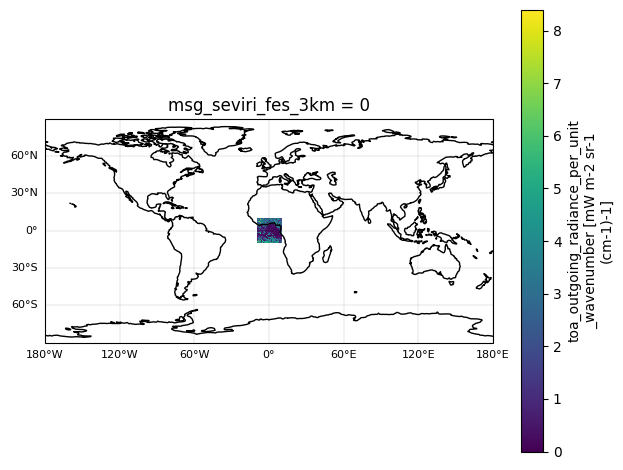

In [68]:
import cartopy.crs as ccrs

# Create a Geostationary projection object
geos_projection = ccrs.Geostationary(central_longitude=0.0, satellite_height=35785831)

# in an even better way 
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ds_c.IR_016.plot.imshow(ax=ax, x="x", y="y", transform=geos_projection)

ax.coastlines()
# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 
plt.tight_layout()
plt.show()

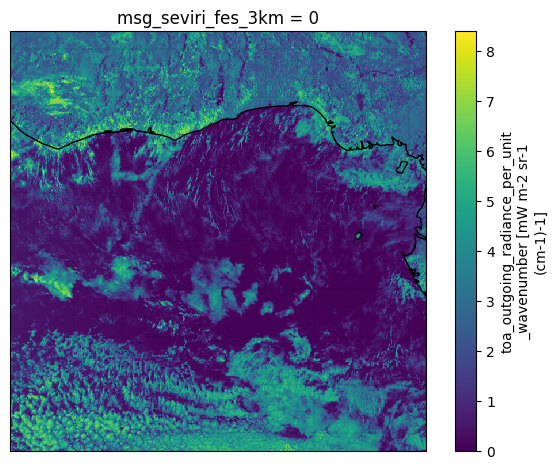

In [73]:
# Create a Geostationary projection object
geos_projection = ccrs.Geostationary(central_longitude=0.0, satellite_height=35785831)

# in an even better way 
fig = plt.figure()
ax = plt.axes(projection=geos_projection)

ds_c.IR_016.plot.imshow(ax=ax, x="x", y="y", transform=geos_projection)

ax.coastlines()
# Plot lat/lon grid 
gl = ax.gridlines(crs=geos_projection, draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 
plt.tight_layout()

In [94]:
ds_c

<xarray.Dataset>
Dimensions:             (y: 729, x: 723)
Coordinates: (12/16)
    IR_016_acq_time     (y) datetime64[ns] 2020-10-01T15:05:11.489000 ... 202...
  * y                   (y) float64 -1.092e+06 -1.089e+06 ... 1.092e+06
  * x                   (x) float64 -1.083e+06 -1.08e+06 ... 1.08e+06 1.083e+06
    longitude           (y, x) float64 dask.array<chunksize=(365, 723), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_039_acq_time     (y) datetime64[ns] 2020-10-01T15:05:15.104000 ... 202...
    ...                  ...
    IR_134_acq_time     (y) datetime64[ns] 2020-10-01T15:05:15.104000 ... 202...
    VIS006_acq_time     (y) datetime64[ns] 2020-10-01T15:05:11.489000 ... 202...
    VIS008_acq_time     (y) datetime64[ns] 2020-10-01T15:05:11.489000 ... 202...
    WV_062_acq_time     (y) datetime64[ns] 2020-10-01T15:05:15.104000 ... 202...
    WV_073_acq_time     (y) datetime64[ns] 2020-10-01T15:05:15.104000 ... 202...
    msg_seviri_fes_3km  int64 0
Data variables:
    IR_016              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_039              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_087              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_097              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_108              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_120              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    IR_134              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    VIS006              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    VIS008              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    WV_062              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
    WV_073              (y, x) float32 dask.array<chunksize=(365, 723), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-03-21 15:13:26.072078
    Conventions:  CF-1.7

In [17]:
def preprocess(ds):

    ds = ds.copy()

    ds = add_msg_crs(ds)
    
    # subset data
    bbox = (-10, -10, 10, 10)
    lon_bnds = (bbox[0], bbox[2])
    lat_bnds = (bbox[1], bbox[3])
    x_bnds, y_bnds = convert_lat_lon_to_x_y(ds_c.rio.crs, lon=lon_bnds, lat=lat_bnds, )
    ds_c = ds_c.sortby("x").sortby("y")
    ds_subset = ds_c.sel(
        y=slice(y_bnds[0], y_bnds[1]),
        x=slice(x_bnds[0], x_bnds[1])
    )
    
    # # resampling
    # resolution = 1_000 # [m]
    # method = "cubic"
    # ds_subset = resample_rioxarray(ds, resolution=resolution, method=method)
    # ds_subset = calc_latlon(ds_subset)

    # assign coordinates
    ds_subset = ds_subset[["Rad", "DQF"]]
    time_stamp = pd.to_datetime(ds.t.values)
    time_stamp = time_stamp.strftime("%Y-%m-%d %H:%M")
    band_attrs = ds.band.attrs
    band_wvl_attrs = ds.band_wavelength.attrs
    ds_subset[["Rad", "DQF"]] = ds_subset[["Rad", "DQF"]].expand_dims({"band":ds.band.values, "time":[time_stamp]})
    ds_subset = ds_subset.drop_vars(["t", "y_image", "x_image", "goes_imager_projection"])
    ds_subset.band.attrs = band_attrs
    ds_subset = ds_subset.assign_coords({"band_wavelength": ds.band_wavelength.values})
    ds_subset.band_wavelength.attrs = band_wvl_attrs

    return ds_subset

In [18]:
%%time
ds = xr.open_mfdataset(
    "/home/juanjohn/data/rs/goes16/raw/noaa-goes16/ABI-L1b-RadF/2018/274/14/OR_ABI-L1b-RadF-M4C02*"
)
ds_subset = preprocess(ds)
ds_subset

CPU times: user 3.26 s, sys: 299 ms, total: 3.56 s
Wall time: 3.29 s


<xarray.Dataset> Size: 150MB
Dimensions:          (band: 1, time: 1, y: 2068, x: 3014, band_wavelength: 1)
Coordinates:
  * x                (x) float64 24kB -4.645e+06 -4.644e+06 ... -1.632e+06
  * y                (y) float64 17kB 5.481e+05 5.471e+05 ... -1.519e+06
    latitude         (y, x) float64 50MB 5.304 5.304 5.304 ... -14.04 -14.04
    longitude        (y, x) float64 50MB -126.8 -126.8 -126.8 ... -90.51 -90.5
  * band             (band) int8 1B 2
  * time             (time) object 8B '2018-10-01 14:02'
  * band_wavelength  (band_wavelength) float32 4B 0.64
Data variables:
    Rad              (band, time, y, x) float32 25MB 0.6443 0.1685 ... nan nan
    DQF              (band, time, y, x) float32 25MB 0.0 0.0 0.0 ... nan nan nan
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    production_data_source:    Realtime
    timeline_id:               ABI Mode 4
    date_created:              2018-10-01T14:05:07.3Z
    time_coverage_start:       2018-10-01T14:00:22.4Z
    time_coverage_end:         2018-10-01T14:05:02.7Z
    id:                        f0161463-ab8d-4e15-91af-890acbb28956

#### Test II - A few Files

In [19]:
file_path = "/home/juanjohn/data/rs/goes16/raw/noaa-goes16/ABI-L1b-RadF/2018/274/14"
files = [
    # Band 1 - 10,848
    f"{file_path}/OR_ABI-L1b-RadF-M4C01_G16_s20182741400224_e20182741405027_c20182741405078.nc",
    # Band 2 - 21,696
    f"{file_path}/OR_ABI-L1b-RadF-M4C02_G16_s20182741400224_e20182741405027_c20182741405073.nc",
    # Band 4 - 5,424
    f"{file_path}/OR_ABI-L1b-RadF-M4C04_G16_s20182741400224_e20182741405028_c20182741405062.nc"
]

In [20]:
%%time
# open
ds = [xr.open_mfdataset(ifile, preprocess=preprocess, concat_dim="band", combine="nested") for ifile in files]
# reinterpolate to match coordinates of first image
ds = [ds[0]] + [ids.interp(x=ds[0].x, y=ds[0].y) for ids in ds[1:]]
# concatentate
ds = xr.concat(ds, dim="band")

CPU times: user 8.56 s, sys: 654 ms, total: 9.21 s
Wall time: 8.8 s


In [24]:
!ls /home/juanjohn/data/rs/goes/analysis

20202761609_goes16.nc  20202762009_goes16.nc


In [30]:
ds_ = xr.open_dataset("/home/juanjohn/data/rs/goes/analysis/20202761609_goes16.nc")
ds_

<xarray.Dataset> Size: 947MB
Dimensions:                          (x: 3014, y: 2067, time: 1,
                                      band_wavelength: 16, band: 16)
Coordinates:
  * x                                (x) float64 24kB -4.645e+06 ... -1.632e+06
  * y                                (y) float64 17kB 5.476e+05 ... -1.518e+06
  * time                             (time) <U16 64B '2020-10-02 16:05'
  * band_wavelength                  (band_wavelength) float32 64B 0.47 ... 1...
  * band                             (band) int8 16B 1 2 3 4 5 ... 13 14 15 16
    latitude                         (y, x) float64 50MB ...
    longitude                        (y, x) float64 50MB ...
    retrieval_local_zenith_angle     float32 4B ...
    retrieval_solar_zenith_angle     float32 4B ...
    quantitative_local_zenith_angle  float32 4B ...
    twilight_solar_zenith_angle      float32 4B ...
    cloud_mask                       (time, y, x) float64 50MB ...
Data variables:
    Rad                              (band, time, y, x) float32 399MB ...
    DQF                              (band, time, y, x) float32 399MB ...
Attributes: (12/30)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           RBU
    ...                        ...
    timeline_id:               ABI Mode 6
    date_created:              2020-10-02T16:09:55.4Z
    time_coverage_start:       2020-10-02T16:00:19.3Z
    time_coverage_end:         2020-10-02T16:09:50.1Z
    LUT_Filenames:             SpaceLookParams(FM1A_CDRL79RevP_PR_09_00_02)-6...
    id:                        27062453-6bd0-4259-9de9-28d3b20d7a07

In [29]:
ds_.close()

#### Test III - All The Files

In [21]:
list_of_files = get_list_filenames(file_path, "*.nc")

In [22]:
%%time
# open
ds = [xr.open_mfdataset(ifile, preprocess=preprocess, concat_dim="band", combine="nested") for ifile in list_of_files]
# reinterpolate to match coordinates of first image
ds = [ds[0]] + [ids.interp(x=ds[0].x, y=ds[0].y) for ids in ds[1:]]
# concatentate
ds = xr.concat(ds, dim="band")

CPU times: user 42.5 s, sys: 3.25 s, total: 45.7 s
Wall time: 45.2 s


In [23]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:          (x: 3014, y: 2067, time: 1, band_wavelength: 16, band: 16)
Coordinates:
  * x                (x) float64 24kB -4.645e+06 -4.644e+06 ... -1.632e+06
  * y                (y) float64 17kB 5.476e+05 5.466e+05 ... -1.518e+06
  * time             (time) object 8B '2018-10-01 14:02'
  * band_wavelength  (band_wavelength) float32 64B 0.47 0.64 0.865 ... 12.3 13.3
  * band             (band) int8 16B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    latitude         (band, y, x) float64 797MB 5.299 5.299 ... -14.04 -14.04
    longitude        (band, y, x) float64 797MB -126.8 -126.8 ... -90.5 -90.49
Data variables:
    Rad              (band, time, y, x) float64 797MB 0.8629 0.8629 ... nan nan
    DQF              (band, time, y, x) float64 797MB 0.0 0.0 0.0 ... nan nan
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    production_data_source:    Realtime
    timeline_id:               ABI Mode 4
    date_created:              2018-10-01T14:05:07.8Z
    time_coverage_start:       2018-10-01T14:00:22.4Z
    time_coverage_end:         2018-10-01T14:05:02.7Z
    id:                        6386f771-1da9-4d21-bab8-2db1b54c6cc5

## Stage 3

* Normalization
* Patching

#### Running Mean

In [25]:
save_dir_analysis = "/home/juanjohn/data/rs/goes16/analysis/"

In [26]:
def mean_preprocess(ds):
    # calculate the mean
    ds = ds["Rad"].mean(["x", "y"])
    return ds

In [27]:
ds_mean = xr.open_mfdataset(str(Path(save_dir_analysis).joinpath("*.nc")), preprocess=mean_preprocess, concat_dim="time", combine="nested")

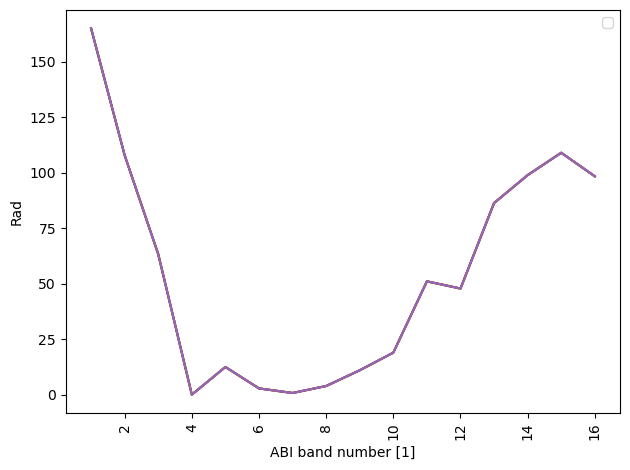

In [28]:
fig, ax = plt.subplots()
ds_mean.plot.line(x="band", ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend([])
plt.show()

In [29]:
ds_mean = ds_mean.mean(["time"])

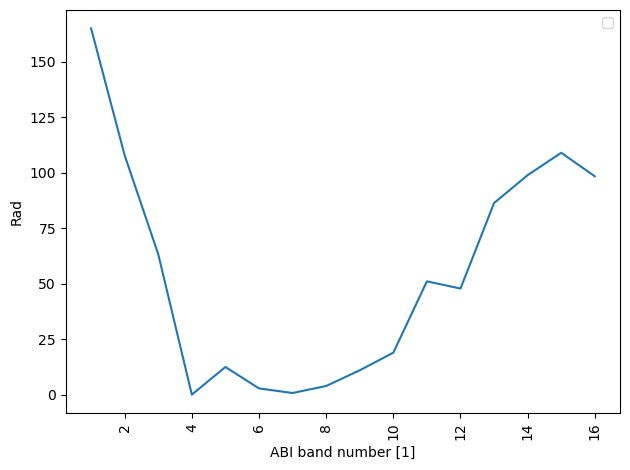

In [30]:
fig, ax = plt.subplots()
ds_mean.plot.line(x="band", ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend([])
plt.show()

In [31]:
def std_preprocess(ds):
    # calculate the mean
    ds = ((ds.Rad - ds_mean)**2).std(["x","y"])
    return ds

In [32]:
ds_std = xr.open_mfdataset(str(Path(save_dir_analysis).joinpath("*.nc")), preprocess=std_preprocess, concat_dim="time", combine="nested")

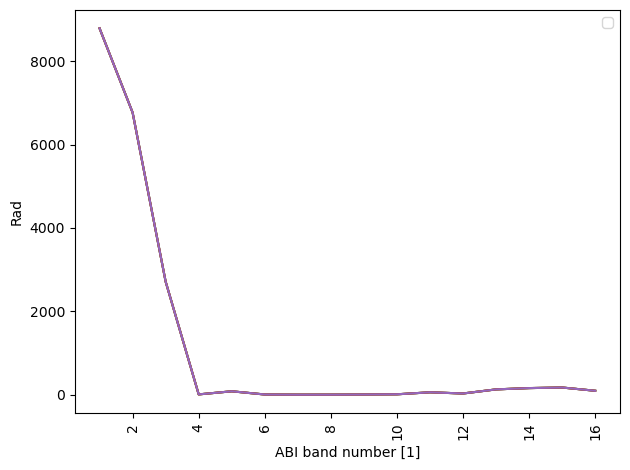

In [33]:
fig, ax = plt.subplots()
ds_std.plot.line(x="band", ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend([])
plt.show()

In [34]:
ds_std = ds_std.mean(["time"])

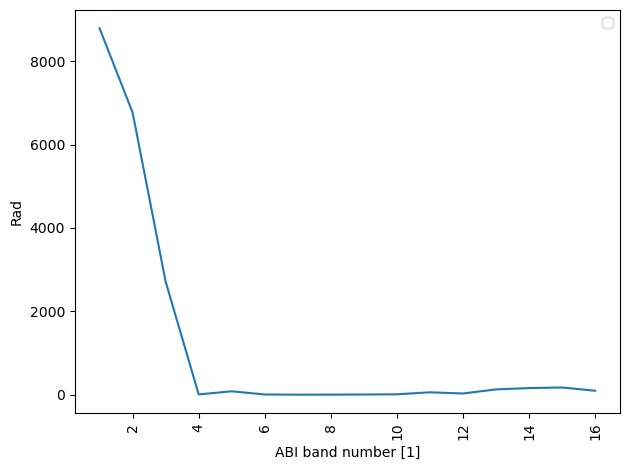

In [35]:
fig, ax = plt.subplots()
ds_std.plot.line(x="band", ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend([])
plt.show()

### Patching

In [36]:
from xrpatcher._src.base import XRDAPatcher

In [37]:
patches = dict(x=256, y=256)
strides = dict(x=64, y=64)
patcher = XRDAPatcher(da=ds.Rad, patches=patches, strides=strides)

In [38]:
len(patcher)

1276

In [39]:
ipatch = patcher[0]
ipatch

<xarray.DataArray 'Rad' (band: 16, time: 1, y: 256, x: 256)> Size: 8MB
array([[[[  0.86286354,   0.86286354,   0.86286354, ...,  13.04445839,
           13.04445839,  13.04445839],
         [  0.86286354,   0.86286354,   0.86286354, ...,  13.04445839,
           13.04445839,  13.04445839],
         [  0.86286354,   0.86286354,   0.86286354, ...,  13.04445839,
           13.04445839,  13.04445839],
         ...,
         [  1.67496872,   1.67496872,   0.86286354, ...,  14.66867256,
           14.66867256,  15.48077583],
         [  1.67496872,   1.67496872,   1.67496872, ...,  15.48077583,
           15.48077583,  14.66867256],
         [  0.86286354,   1.67496872,   0.86286354, ...,  14.66867256,
           14.66867256,  14.66867256]]],


       [[[  0.40585485,   0.32745574,   0.60445339, ...,   5.7194189 ,
            5.75942312,   5.87711209],
         [  0.56480587,   0.40675145,   0.48586897, ...,   5.87818931,
            5.71816058,   5.44152303],
         [  0.60373612,   0.3665658 ,   0.68482795, ...,   6.07606896,
...
          116.66930389, 115.03455078],
         [         nan, 117.19704437, 117.2498035 , ..., 116.66910301,
          116.66930389, 115.5085649 ],
         [         nan, 117.19713698, 117.24961835, ..., 116.66891787,
          116.66911866, 115.50856485]]],


       [[[         nan,  96.52262878,  96.52262878, ...,  99.3391633 ,
           99.3392525 ,  98.98784019],
         [         nan,  96.52262878,  96.52262878, ...,  99.16350555,
           99.16350555,  99.16350555],
         [         nan,  96.52293774,  96.52293774, ...,  99.1635054 ,
           99.16350555,  99.16350555],
         ...,
         [         nan,  97.75441747,  97.75503524, ...,  98.98766148,
           98.98775099,  98.81112198],
         [         nan,  97.40291595,  97.75494604, ...,  99.16332684,
           99.16350555,  98.63546424],
         [         nan,  97.40353388,  97.75463732, ...,  99.163327  ,
           99.16350555,  98.63577312]]]])
Coordinates:
  * x        (x) float64 2kB -4.645e+06 -4.644e+06 ... -4.391e+06 -4.39e+06
  * y        (y) float64 2kB 5.476e+05 5.466e+05 ... 2.936e+05 2.926e+05
  * time     (time) object 8B '2018-10-01 14:02'
  * band     (band) int8 16B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavelength
    sensor_band_bit_depth:  10
    valid_range:            [   0 1022]
    units:                  W m-2 sr-1 um-1
    resolution:             y: 0.000028 rad x: 0.000028 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF

In [63]:

for i, ipatch in enumerate(patcher):
    # save as numpy files
    np.savez(Path(save_dir_mlready).joinpath(f"{demo}_reflectance_patch_{i}.npz"), ipatch.values)
    np.savez(Path(save_dir_mlready).joinpath(f"{demo}_latitude_patch_{i}.npz"), ipatch.latitude.values)
    np.savez(Path(save_dir_mlready).joinpath(f"{demo}_longitude_patch_{i}.npz"), ipatch.longitude.values)
    np.savez(Path(save_dir_mlready).joinpath(f"{demo}_cloudmask_patch_{i}.npz"), ipatch.cloud_mask.values)
    break

In [46]:
mldata_dir = Path("/home/juanjohn/data/rs/goes16/mlready")

In [47]:
# !ls $mldata_dir

## Datasets, DataLoaders

In [40]:
from torch.utils.data import Dataset, DataLoader
from typing import Optional, Callable

In [88]:
class ImageDataReader(Dataset):
    def __init__(self, data_dir: str, ext: str=".npy", transforms: Optional[Callable]=None):
        self.data_dir = data_dir
        data_filenames = get_list_filenames(data_dir, ext)
        # filter files
        self.data = list(filter(lambda x: "reflectance" in x, data_filenames))
        self.lats = list(filter(lambda x: "latitude" in x, data_filenames))
        self.lons = list(filter(lambda x: "longitude" in x, data_filenames))
        self.masks = list(filter(lambda x: "cloudmask" in x, data_filenames))
        assert len(self.data) == len(self.lats) == len(self.lons) == len(self.masks)
        self.transforms = transforms

    def __getitem__(self, ind) -> np.ndarray:
        sample = {}
        sample["data"] = np.load(self.data[ind], mmap_mode="r+")
        sample["lats"] = np.load(self.lats[ind], mmap_mode="r+")
        sample["lons"] = np.load(self.lons[ind], mmap_mode="r+")
        sample["mask"] = np.load(self.masks[ind], mmap_mode="r+")
        if self.transforms is not None:
            sample = self.transforms(sample)
        return sample

    def __len__(self):
        return len(self.data)

In [89]:
ds = ImageDataReader("/home/juanjohn/data/rs/modis/mlready")

In [87]:
isample = ds[0]

#### DataLoader

In [83]:
dl = DataLoader(ds, batch_size=64, shuffle=False)

In [84]:
for isample in dl:
    break

In [85]:
isample["data"].shape

torch.Size([64, 1, 38, 256, 256])